# CS 273A Homework 5
Marzhan Bekbalanova
Machine Learning, CS 273A, Winter 2020

In [20]:
import numpy as np
import mltools as ml
import mltools.cluster as cluster
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plots
%matplotlib inline

# 1 Clustering, 45 points

1. Load the usual Iris data restricted to the first two features, and ignore the class / target variable. Plot
the data and see for yourself how “clustered” you think it looks. Include the plot, and mention how
many clusters you think exist (no wrong answer here). (5 points)

In [22]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1]
X = iris[:,0:2]
print(X.shape)

(148, 2)


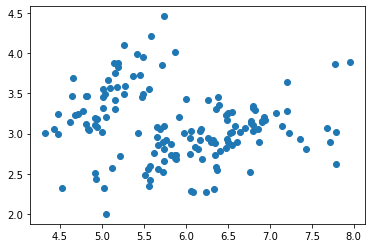

In [23]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()


It looks like there are two visibly separate clusters but there could be more 

2. Run k-means on the data, for k = 2, k = 5, and k = 20. Try a few (at least 5 each) different initializations and check to see whether they find the same solution; if not, pick the one with the best score. For
the chosen assignment for each k, include a plot with the data, colored by assignment, and the cluster
centers. You can plot the points colored by assignments using ml.plotClassify2D(None,X,z),
where z are the resulting cluster assignments of the data. You will have to additionally plot the centers
yourself. (15 points)

0 57.877648396983034
1 57.87966196118197
2 57.87966196118197
3 57.877648396983034
4 57.877648396983034
5 57.877648396983034
6 57.877648396983034
7 57.87966196118197
8 57.87966196118197
9 57.877648396983034


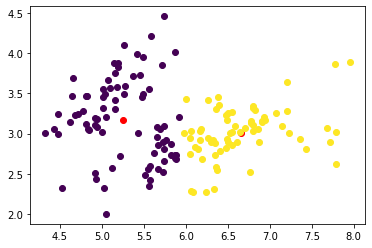

In [24]:
# k-means, k=2
ssd = np.inf
for it in range(10):
    Zi,mui,ssdi = cluster.kmeans(X,K=2,init='random')
    print(it, ssdi)
    if ssdi < ssd:
        Z,mu,ssd = Zi,mui,ssdi
# Now, plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0], mu[:,1], c='r', marker='o')
plt.show()

0 21.341435584990826
1 25.412400972159052
2 25.412400972159052
3 20.856963620246418
4 23.889675639615003
5 27.69597104280278
6 24.24209562294543
7 20.886682200353754
8 20.92966599414736
9 21.355740811726477


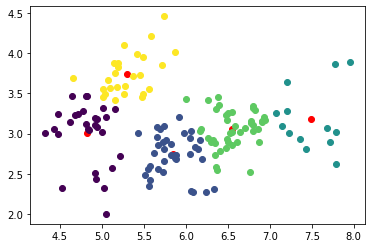

In [25]:
# k-means, k=5
ssd = np.inf
for it in range(10):
    Zi,mui,ssdi = cluster.kmeans(X,K=5,init='random')
    print(it, ssdi)
    if ssdi < ssd:
        Z,mu,ssd = Zi,mui,ssdi
# Now, plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0], mu[:,1], c='r', marker='o')
plt.show()

0 4.687787819974543
1 4.641013318398015
2 6.610802538000302
3 4.988975099289116
4 4.6565822131481145
5 4.87611448597714
6 5.628280828616128
7 5.951695274913111
8 5.329693248483327
9 6.223922758048817


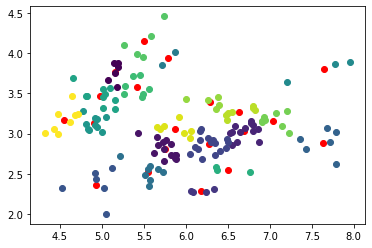

In [26]:
# for k=20
ssd = np.inf
for it in range(10):
    Zi,mui,ssdi = cluster.kmeans(X,K=20,init='random')
    print(it, ssdi)
    if ssdi < ssd:
        Z,mu,ssd = Zi,mui,ssdi
# Now, plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0], mu[:,1], c='r', marker='o')
plt.show()


3. Run agglomerative clustering on the data, using single linkage and then again using complete linkage,
each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py).
Again, plot with color the final assignment of the clusters. (This algorithm has no initialization issues;
so you do not have to try multiple initializations.) (20 points)

Single linkage, K=2


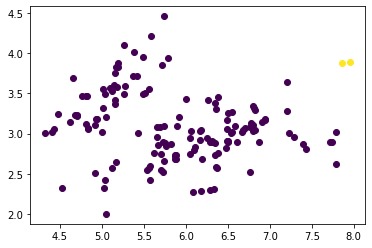

Single linkage, K=5


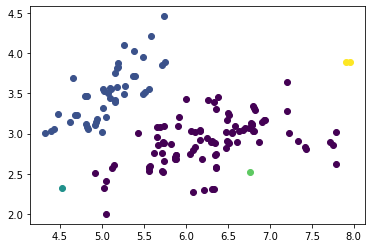

Single linkage, K=20


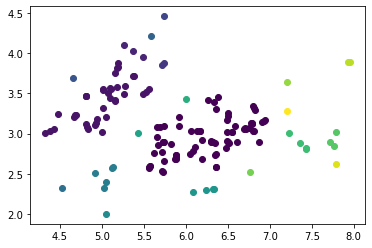

Complete linkage, K=2


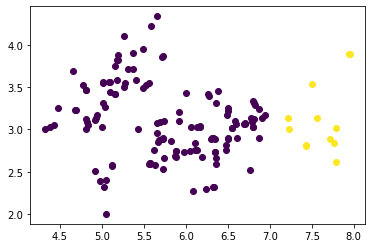

Complete linkage, K=5


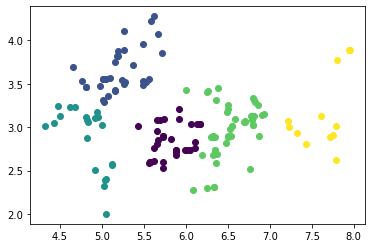

Complete linkage, K=20


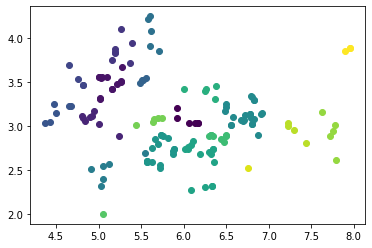

In [7]:
# agglomerative clustering
Z,dend = cluster.agglomerative(X, K=2, method='min')
plt.figure()
print("Single linkage, K=2")
ml.plotClassify2D(None,X,Z)
plt.show()
Z,dend = cluster.agglomerative(X, K=5, method='min')
plt.figure()
print("Single linkage, K=5")
ml.plotClassify2D(None,X,Z)
plt.show()
Z,dend = cluster.agglomerative(X, K=20, method='min')
plt.figure()
print("Single linkage, K=20")
ml.plotClassify2D(None,X,Z)
plt.show()
Z,dend = cluster.agglomerative(X, K=2, method='max')
plt.figure()
print("Complete linkage, K=2")
ml.plotClassify2D(None,X,Z)
plt.show()
Z,dend = cluster.agglomerative(X, K=5, method='max')
plt.figure()
print("Complete linkage, K=5")
ml.plotClassify2D(None,X,Z)
plt.show()
Z,dend = cluster.agglomerative(X, K=20, method='max')
plt.figure()
print("Complete linkage, K=20")
ml.plotClassify2D(None,X,Z)
plt.show()

4. Describe similarities and differences in the results from the agglomerative clustering and k-means. (5
points)

K-means clustering looks approximately same in size and more spherical. Agglomerative clustering with complete linkage is very similar to k-means. Single linkage agglomerative clustering shows results that are with different sizes and shapes which make them more flexible to single data points.

# 2 EigenFaces, 50 points

1. Subtract the mean of the face images (X0 = X − µ) to make your data zero-mean. (The mean should
be of the same dimension as a face, 576 pixels.) Plot the mean face. (5 points)

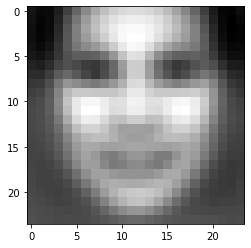

In [28]:
X = np.genfromtxt("data/faces.txt",delimiter=None) # load face dataset
mu = X.mean(axis=0, keepdims=True)
X0 = X - mu # remove the mean
plt.figure()
img = np.reshape(mu, (24,24))
plt.imshow(img.T, cmap="gray")
plt.show()

2. Use scipy.linalg.svd to take the SVD of the data, so that
Since the number of data is larger than the number of dimensions, there are at most 576 non-zero
singular values; you can use full matrices=False to avoid using a lot of memory. As in the
slides, we suggest computing W = U.dot( np.diag(S) ) so that X0 ≈ W · Vh. Print the
shapes of W and Vh. (10 points)

In [29]:
import scipy.linalg
U,S,V = scipy.linalg.svd(X0, False)
W = U.dot( np.diag(S) );
print(W.shape, V.shape)

(4916, 576) (576, 576)


3. For K = 1 . . . 12, compute the approximation to X0 given by the first K eigendirections, e.g., X0 =W[:, : K] · V h[: K, :], and use them to compute the mean squared error in the SVD’s approximation,
np.mean( (X0 − Xˆ0)**2 ). Plot these MSE values as a function of K. (10 points)

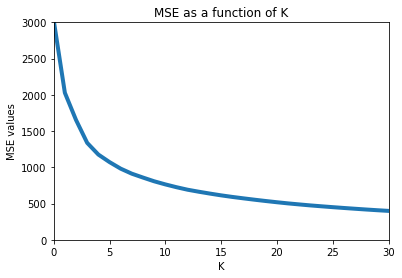

In [32]:
err = [None]*31
for k in range(31):
    Xhat0 = W[:,:k].dot( V[:k,:] )
    err[k] = ((X0-Xhat0)**2).mean()

plt.plot(range(31),err,linewidth=4)
plt.axis((0,30,0,3000))
plt.title("MSE as a function of K")
plt.xlabel("K")
plt.ylabel("MSE values")
plt.show()


4. Display the first three principal directions of the data, by computing µ+α V[j,:] and µ-α V[j,:], where
α is a scale factor (we suggest, for example, 2*np.median(np.abs(W[:,j])), to get a sense
of the scale found in the data). These should be vectors of length 242 = 576, so you can reshape them
and view them as “face images” just like the original data. They should be similar to the images in
lecture. (10 points)

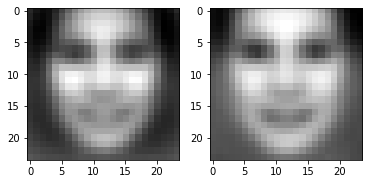

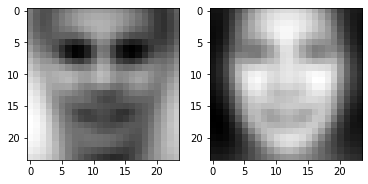

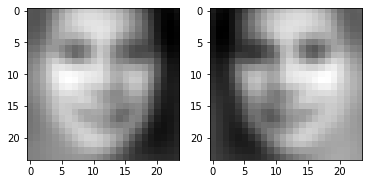

In [14]:
for k in range(3):
    alpha = 2*np.median( np.abs( W[:,k] ));
    im1 = np.reshape(mu + alpha*V[k,:], (24,24));
    im2 = np.reshape(mu - alpha*V[k,:], (24,24));
    f,(ax1,ax2) = plt.subplots(1,2);
    ax1.imshow(im1.T, cmap="gray");
    ax2.imshow(im2.T, cmap="gray");
    plt.show()

5. Choose any two faces and reconstruct them using the first K principal directions, for K = 5, 10, 50, 100.
(5 points)


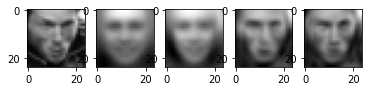

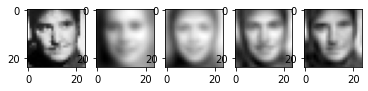

In [30]:
for i in [20,30]:
    im = X[i,:];
    im = np.reshape(im, (24,24));
    f,ax = plt.subplots(1,5);
    ax[0].imshow(im.T, cmap="gray");
    for j,k in enumerate([5,10,50,100]):
        im = mu + W[i,0:k].dot( V[0:k,:] );
        im = np.reshape(im, (24,24));
        ax[j+1].imshow(im.T, cmap="gray");
    plt.show()

6. Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as
a new geometric space in which the data are being described. To visualize this, choose a few faces
(say 25), and display them as images in a two-dimensional plane (as in the lecture), where the twodimensional coordinates are given by their coefficients on the first two principal components:

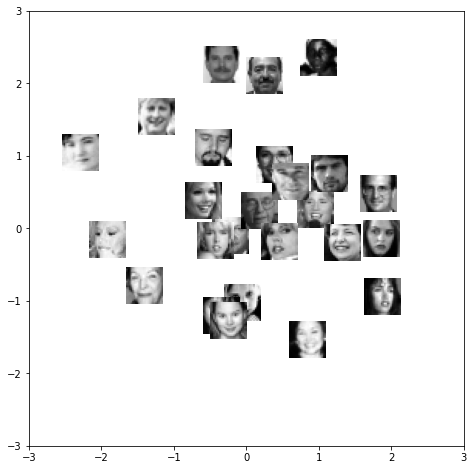

In [18]:
import mltools.transforms
idx = np.floor( 4916*np.random.rand(25) ); # pick some data
idx = idx.astype('int')
plt.rcParams['figure.figsize'] = (8.0, 8.0)
coord,params = ml.transforms.rescale(W[:,0:2])
for i in idx:
    loc = (coord[i,0],coord[i,0]+.5, coord[i,1],coord[i,1]+.5)
    plt.imshow(np.reshape(X[i,:],(24,24)).T , cmap="gray", extent=loc );
    plt.axis( (-3,3,-3,3) )

# Statement of Collaboration (5 points)

I, Marzhan Bekbalanova, have not collaborated with anyone

Thank you! Have a  nice day